<h1> EDA, Exploratory Data Analysis / Исследовательский анализ данных

Выполнила: Кожина Анастасия Вячеславовна

Группа: БСВ21-01

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import ipywidgets as widgets

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.preprocessing import StandardScaler

# 1) Постановка задачи

**Название задачи - Yeast data set**

Тип задачи: Классификация

Ссылка на задачу: https://archive.ics.uci.edu/ml/datasets/Yeast

Ссылка на БД: https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data

<u>Краткое описание:</u> прогнозируемый признак: место локалицазии белка (не числовой).

<u>Описание независимых переменных:</u>


1. Sequence name: номер доступа к базе данных SWISS-PROT
2. mcg: метод McGeoch's для распознавания сигнальной последовательности
3. gvh: метод von Heijne's для распаознавания сигнальной последовательности
4. alm: оценка программы прогнозирования области, охватывающей мембрану ALOM.
5. mit: оценка дискриминантного анализа содержания аминокислот в N-концевой области (длиной 20 остатков) митохондриальных и немитохондриальных белков.
6. erl: наличие подстроки «HDEL» (считается, что она действует как сигнал удержания в просвете эндоплазматического ретикулума). Бинарный атрибут.
7. pox: сигнал нацеливания пероксисом на С-конце.
8. vac: оценка дискриминантного анализа аминокислотного состава вакуолярных и внеклеточных белков.
9. nuc: оценка дискриминантного анализа сигналов ядерной локализации ядерных и неядерных белков.

# 2) Импорт данных

In [ ]:
data_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header = None, sep='\s+')
data_raw.head(3)

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT


In [ ]:
data_raw.tail(3)

,0,1,2,3,4,5,6,7,8,9
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,G6PD_YEAST,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


**Выводы.** Данные импортированны корректно, структура первых и последних сток сопадает. Нет названий столбцов.

In [ ]:
data_raw.columns = ['Sequence name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac' , 'nuc', 'class']
data_raw.head(3)

,Sequence name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT


In [ ]:
numerical_names = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac' , 'nuc']
categorical_names = ['Sequence name','class']

# 3) Визуализация в табличном виде

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence name  1484 non-null   object 
 1   mcg            1484 non-null   float64
 2   gvh            1484 non-null   float64
 3   alm            1484 non-null   float64
 4   mit            1484 non-null   float64
 5   erl            1484 non-null   float64
 6   pox            1484 non-null   float64
 7   vac            1484 non-null   float64
 8   nuc            1484 non-null   float64
 9   class          1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


Описательная статистика для количественных данных

In [ ]:
data_raw[numerical_names].describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


Описательная статистика для категориальных данных.

In [ ]:
data_raw[categorical_names].describe()

,Sequence name,class
count,1484,1484
unique,1462,10
top,RS4E_YEAST,CYT
freq,2,463


Вывод: Столбец 'Sequence name' является не нужным

In [ ]:
data_raw = data_raw.drop('Sequence name', axis = 1)

In [ ]:
data_raw.tail(3)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


# 4) Визуальный анализ распределений и разброса данных

## 4.1) Графики box-plot (количественные данные) и bar-plot (категориальные данные)

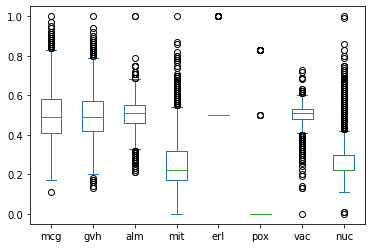

In [ ]:
data_raw.plot(kind='box')
plt.show()

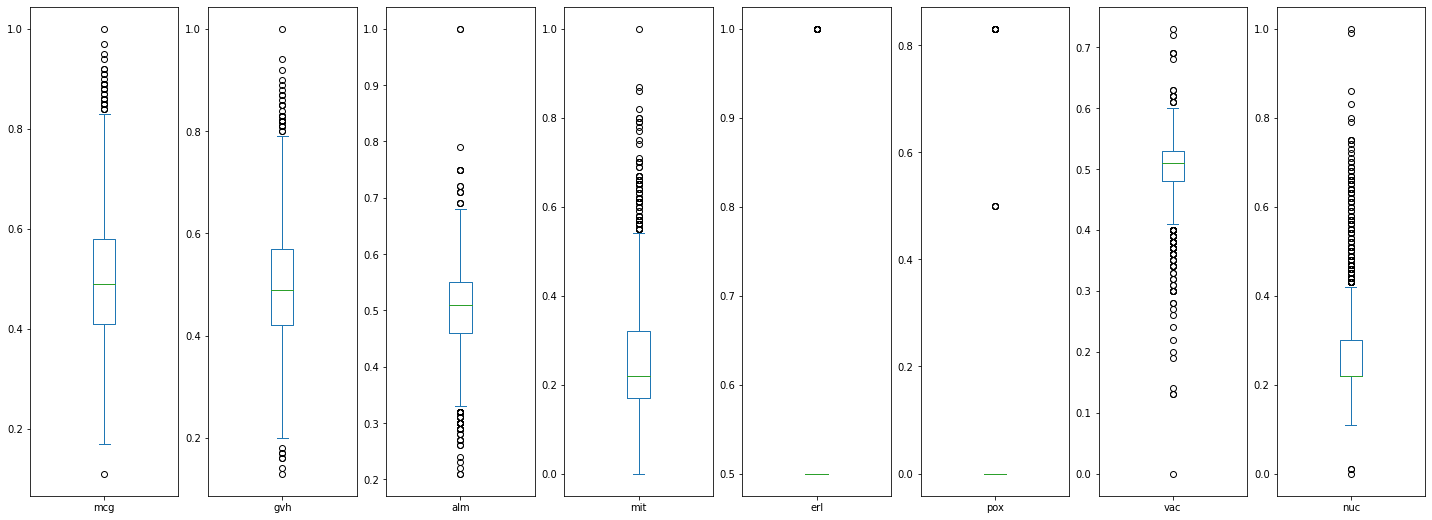

In [ ]:
data_raw.plot(kind='box', subplots=True, figsize=(25,9))
plt.show()

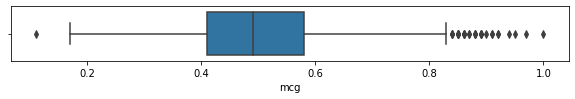

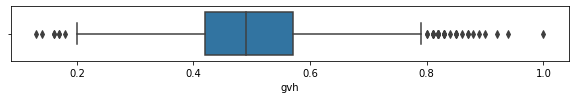

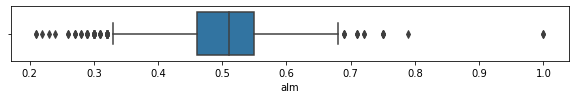

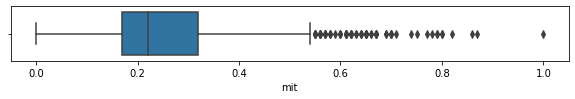

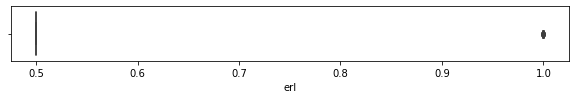

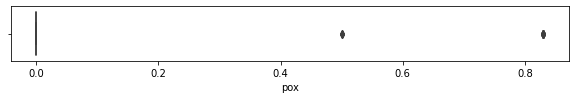

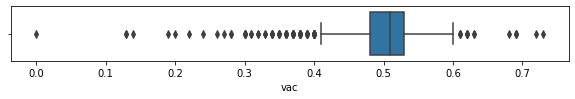

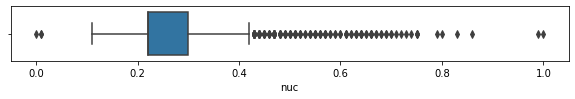

In [ ]:
for col in numerical_names:
  fig, ax = plt.subplots(figsize=(10,1))
  sns.boxplot(data=data_raw, x=col, ax=ax)
  plt.show()

In [ ]:
data_raw['erl'].value_counts()

0.5    1470
1.0      14
Name: erl, dtype: int64

'Erl' является дискретным, операции над этим показателем не имеют смысла

In [ ]:
data_raw['pox'].value_counts()

0.00    1469
0.83      11
0.50       4
Name: pox, dtype: int64

In [ ]:
data_raw = data_raw.drop('pox', axis = 1)

In [ ]:
data_raw = data_raw.drop('erl', axis = 1)

In [ ]:
data_raw.head(3)

,mcg,gvh,alm,mit,vac,nuc,class
0,0.58,0.61,0.47,0.13,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.53,0.22,MIT


In [ ]:
numerical_names = ['mcg', 'gvh', 'alm', 'mit', 'vac' , 'nuc']

## 4.2) Гистограммы с оценкой плотности распределения

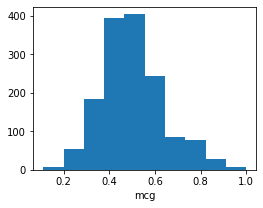

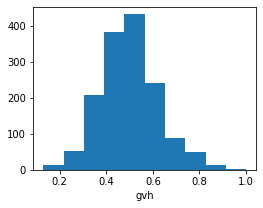

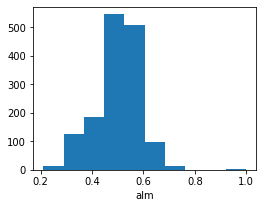

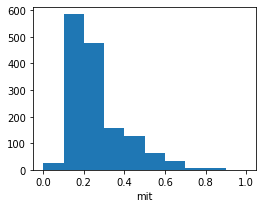

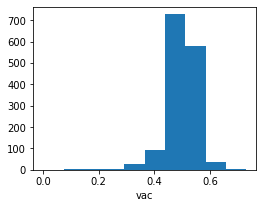

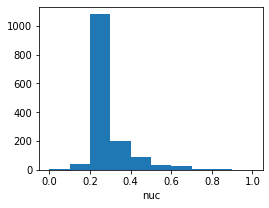

In [ ]:
for col in numerical_names:
  fig, ax = plt.subplots(figsize=(4,3))
  ax.hist(data_raw[col])
  ax.set_xlabel(col)
  plt.show()

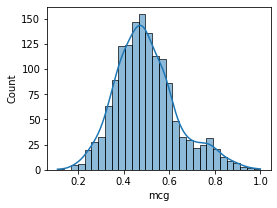

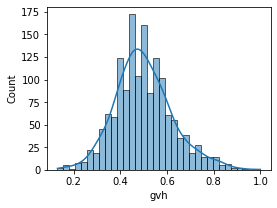

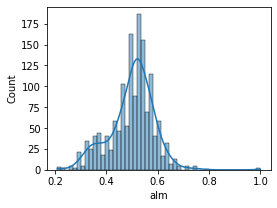

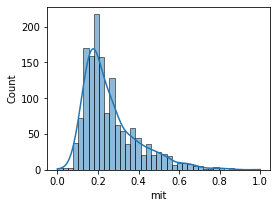

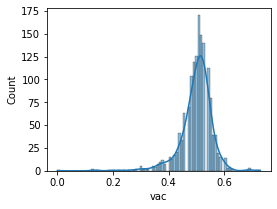

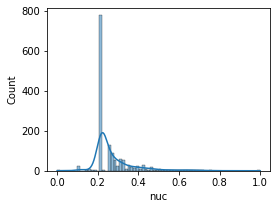

In [ ]:

for col in numerical_names:
  fig, ax = plt.subplots(figsize=(4,3))
  sns.histplot(data=data_raw, x=col,
               kde=True)
  plt.show()

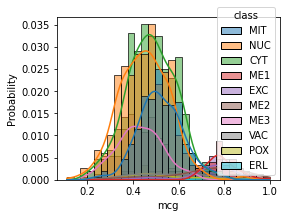

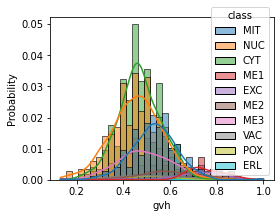

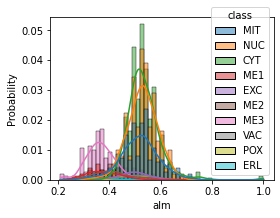

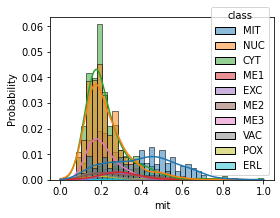

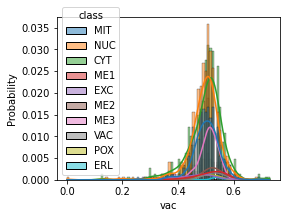

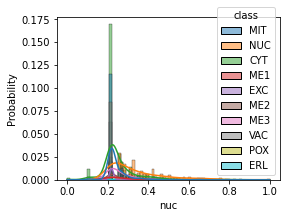

In [ ]:
for col in numerical_names:
  fig, ax = plt.subplots(figsize=(4,3))
  sns.histplot(data=data_raw, x=col,
               kde=True,
               hue='class',
               stat='probability')
  plt.show()

4.3) Barplot

In [ ]:
data_raw['nuc'].value_counts()

0.22    769
0.27     91
0.25     71
0.31     59
0.26     58
       ... 
0.71      1
0.86      1
1.00      1
0.72      1
0.74      1
Name: nuc, Length: 68, dtype: int64

In [ ]:
data_raw['class'].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64

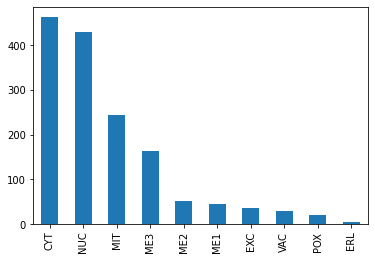

In [ ]:
data_raw['class'].value_counts().plot(kind='bar')
plt.show()

# 5) Визуализация парных графиков корреляция

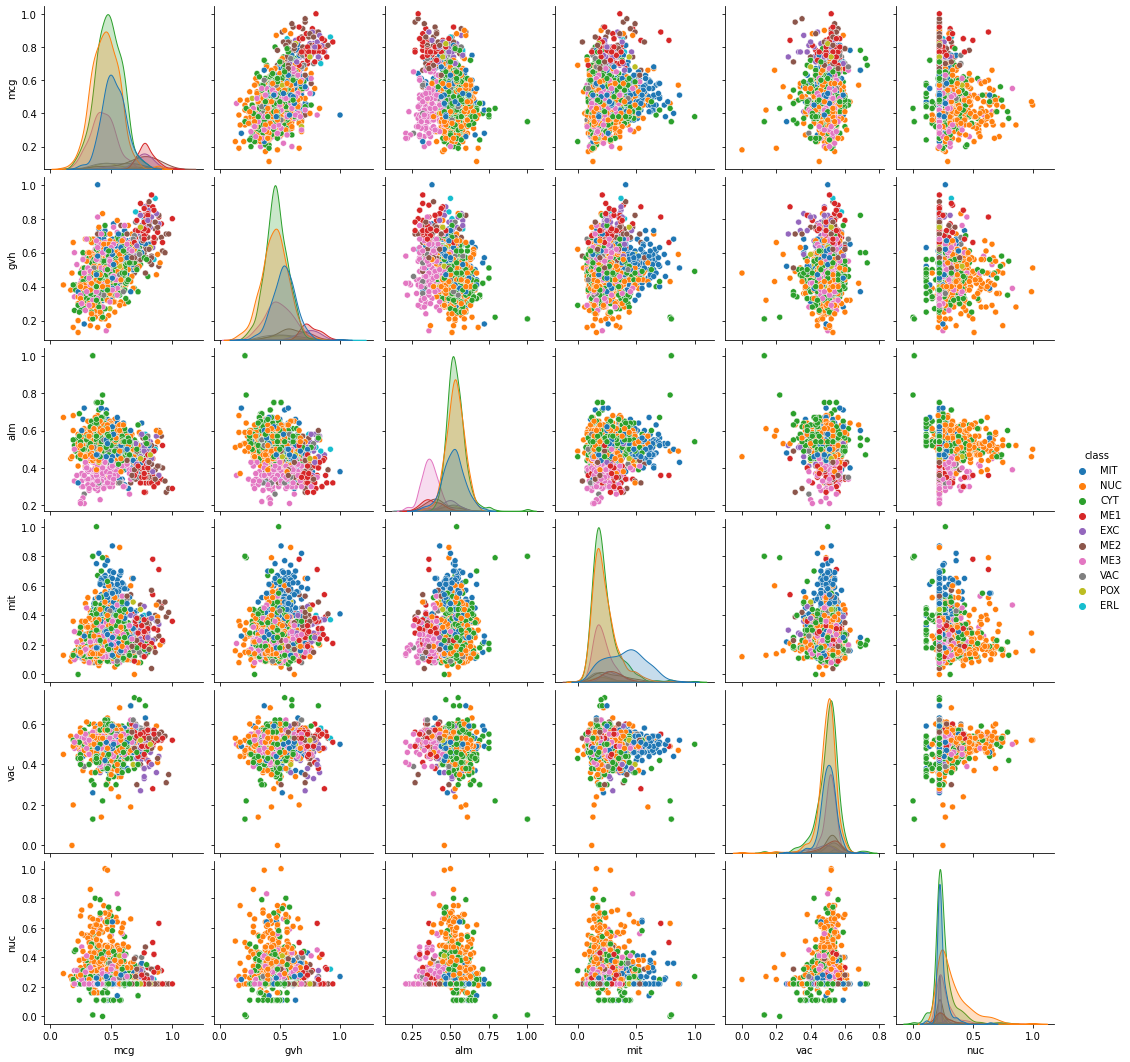

In [ ]:
sns.pairplot(data = data_raw, hue = 'class', kind='scatter')
plt.show()

In [ ]:
def plot_scatter(var1,var2):
  sns.scatterplot(data = data_raw, x = var1, y =var2, hue = 'class')
  plt.show()

In [ ]:
interact(plot_scatter, var1 = ['mcg', 'gvh', 'alm', 'mit', 'vac' , 'nuc'], var2 = ['mcg', 'gvh', 'alm', 'mit', 'vac' , 'nuc'])

interactive(children=(Dropdown(description='var1', options=('mcg', 'gvh', 'alm', 'mit', 'vac', 'nuc'), value='…

<function __main__.plot_scatter>

## Корреляция

In [ ]:
data_raw.corr()

,mcg,gvh,alm,mit,vac,nuc
mcg,1.000000,0.581631,-0.163951,0.158175,0.075043,-0.124540
gvh,0.581631,1.000000,-0.271800,0.140314,0.088759,-0.102984
alm,-0.163951,-0.271800,1.000000,0.059668,-0.185805,-0.022043
mit,0.158175,0.140314,0.059668,1.000000,-0.103591,-0.054797
vac,0.075043,0.088759,-0.185805,-0.103591,1.000000,0.089690
nuc,-0.124540,-0.102984,-0.022043,-0.054797,0.089690,1.000000


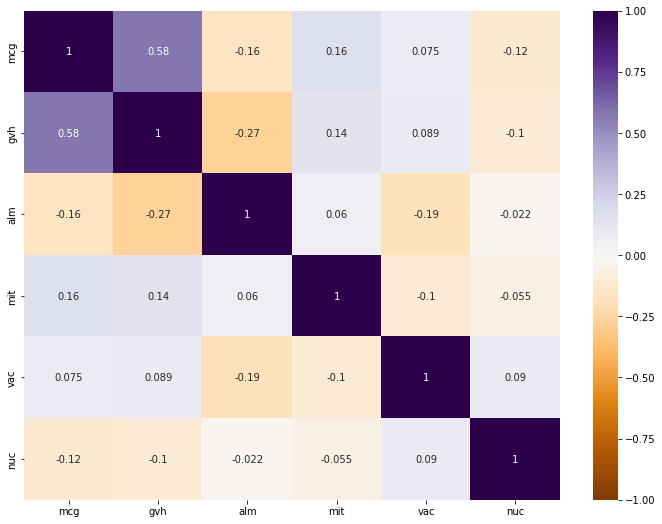

In [ ]:
_, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data=data_raw.corr(),
            annot=True, vmin=-1,vmax=1,
            cmap='PuOr')
plt.show()

# 6) Метод главных компонент

## 6.1)  МГК без нормировки

In [ ]:
input_names = ['mcg', 'gvh', 'alm', 'mit', 'vac' , 'nuc']
target_names = ['class']

In [ ]:
X = data_raw[input_names].values
X

array([[0.58, 0.61, 0.47, 0.13, 0.48, 0.22],
       [0.43, 0.67, 0.48, 0.27, 0.53, 0.22],
       [0.64, 0.62, 0.49, 0.15, 0.53, 0.22],
       ...,
       [0.67, 0.57, 0.36, 0.19, 0.56, 0.22],
       [0.43, 0.4 , 0.6 , 0.16, 0.53, 0.39],
       [0.65, 0.54, 0.54, 0.13, 0.53, 0.22]])

In [ ]:
my_pca_01 = PCA()
my_pca_01.fit(X)
Z = my_pca_01.transform(X)
Z

array([[ 0.08913613, -0.16629472, -0.05036773,  0.01835217,  0.02847641,
         0.02961814],
       [ 0.06555598, -0.01841193, -0.03203048,  0.14646919,  0.10106352,
        -0.03247488],
       [ 0.14258593, -0.16385834, -0.04515098, -0.01890505,  0.02117576,
        -0.02204004],
       ...,
       [ 0.16503379, -0.14792734, -0.02387946,  0.026557  , -0.11840722,
        -0.02833389],
       [-0.1700601 , -0.04370735,  0.07796579, -0.09226767,  0.04610733,
        -0.03800258],
       [ 0.08862386, -0.15832735, -0.06259805, -0.09572189,  0.0072912 ,
        -0.02975335]])

Доля объясненной дисперсии

In [ ]:
print(my_pca_01.explained_variance_ratio_*100)

[39.02623644 23.6052838  14.85645806 10.43899504  7.9833508   4.08967586]


Z в DataFrame

In [ ]:
pca_names = []
for i in range(6):
  pca_names.append('pca_'+str(i+1))
pca_names

['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6']

In [ ]:
pca_data_01 = pd.DataFrame(Z, columns=pca_names)
pca_data_01['class'] = data_raw['class'].copy()
pca_data_01.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,class
0,0.089136,-0.166295,-0.050368,0.018352,0.028476,0.029618,MIT
1,0.065556,-0.018412,-0.032030,0.146469,0.101064,-0.032475,MIT
2,0.142586,-0.163858,-0.045151,-0.018905,0.021176,-0.022040,MIT


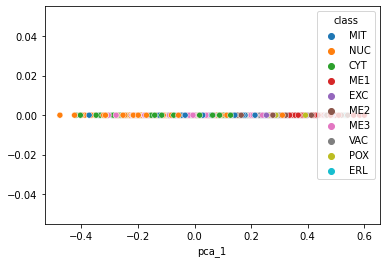

In [ ]:
sns.scatterplot(data = pca_data_01, x='pca_1', y=0, hue='class')
plt.show()

In [ ]:
def plot_scatter(var):
  sns.scatterplot(data = pca_data_01, x = var, y =0, hue = 'class')
  plt.show()

In [ ]:
interact(plot_scatter, var = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6'])

interactive(children=(Dropdown(description='var', options=('pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6…

<function __main__.plot_scatter>

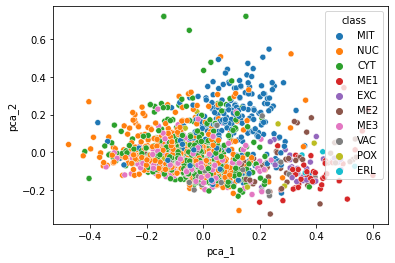

In [ ]:
sns.scatterplot(data = pca_data_01, x='pca_1', y='pca_2', hue='class')
plt.show()

График по 2м главным компонентам

In [ ]:
pca_data_01['c_class'] = 'blue'
pca_data_01.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,class,c_class
0,0.089136,-0.166295,-0.050368,0.018352,0.028476,0.029618,MIT,blue
1,0.065556,-0.018412,-0.032030,0.146469,0.101064,-0.032475,MIT,blue
2,0.142586,-0.163858,-0.045151,-0.018905,0.021176,-0.022040,MIT,blue


In [ ]:
pca_data_01['c_class'][pca_data_01['class'] == 'MIT'] = 'orange'
pca_data_01['c_class'][pca_data_01['class'] == 'NUC'] = 'green'
pca_data_01['c_class'][pca_data_01['class'] == 'ERL'] = 'red'
pca_data_01['c_class'][pca_data_01['class'] == 'ME1'] = 'yellow'
pca_data_01['c_class'][pca_data_01['class'] == 'EXC'] = 'purple'
pca_data_01['c_class'][pca_data_01['class'] == 'ME2'] = 'brown'
pca_data_01['c_class'][pca_data_01['class'] == 'ME3'] = 'black'
pca_data_01['c_class'][pca_data_01['class'] == 'VAC'] = 'pink'
pca_data_01['c_class'][pca_data_01['class'] == 'POX'] = 'grey'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

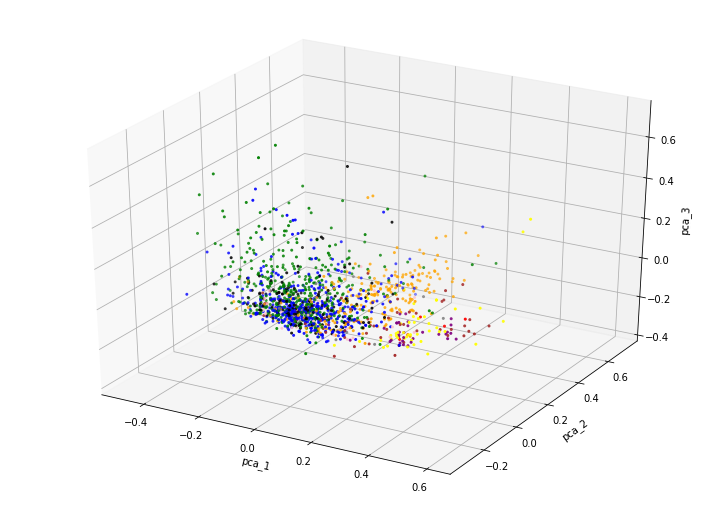

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_data_01['pca_1'], pca_data_01['pca_2'],
           pca_data_01['pca_3'], s=4, c=pca_data_01['c_class'])
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')
plt.show()

# 7) Случайный лес (Random Forest). Оценка важности переменных

In [ ]:
classifier_01 = RandomForestClassifier()
classifier_01.fit(X, data_raw['class'].values)

RandomForestClassifier()

In [ ]:
predict = classifier_01.predict(X)

In [ ]:
print('точноть =', accuracy_score(predict, data_raw['class'].values)*100)

точноть = 100.0


In [ ]:
# важность переменных (доля)
classifier_01.feature_importances_

array([0.18663379, 0.16666827, 0.23504912, 0.18419332, 0.11851453,
       0.10894097])

In [ ]:
print("Важность переменных, %")
for i in range(6):
  print(numerical_names[i],':',classifier_01.feature_importances_[i]*100)

Важность переменных, %
mcg : 18.66337881955565
gvh : 16.666827449096132
alm : 23.50491220318612
mit : 18.419331819082267
vac : 11.851453202300569
nuc : 10.894096506779256
